**I tried to guess the opening price of google stock with recurrent neural network.**

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [56]:
train_dataset = pd.read_csv("Google_Stock_Price_Train.csv") 

In [57]:
train_dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [58]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [59]:
train_dataset["Volume"]

0        7,380,500
1        5,749,400
2        6,590,300
3        5,405,900
4       11,688,800
           ...    
1253       623,400
1254       789,100
1255     1,153,800
1256       744,300
1257     1,770,000
Name: Volume, Length: 1258, dtype: object

In [60]:
newVolumes = []
for i in train_dataset["Volume"]:
    i = i.replace(",","")
    newVolumes.append(float(i))

In [61]:
train_dataset.drop(["Volume"],inplace=True,axis = 1)

In [62]:
train_dataset["Volume"] = newVolumes

In [63]:
train_dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,7380500.0
1,1/4/2012,331.27,333.87,329.08,666.45,5749400.0
2,1/5/2012,329.83,330.75,326.89,657.21,6590300.0
3,1/6/2012,328.34,328.77,323.68,648.24,5405900.0
4,1/9/2012,322.04,322.29,309.46,620.76,11688800.0


In [64]:
train_set = train_dataset.drop(["Date","High","Low","Close"],axis = 1).values

In [65]:
from sklearn.preprocessing import MinMaxScaler
mmsclar = MinMaxScaler()
train_set_scaled = mmsclar.fit_transform(train_set)

In [66]:
train_set_scaled

array([[0.08581368, 0.29525831],
       [0.09701243, 0.22993592],
       [0.09433366, 0.26361233],
       ...,
       [0.95725128, 0.04589107],
       [0.93796041, 0.02949139],
       [0.93688146, 0.07056868]])

In [67]:
X_train = []
y_train = []
for i in range(120, 1258):
    X_train.append(train_set_scaled[i-120:i, 0:2])
    y_train.append(train_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [70]:
X_train.shape

(1138, 120, 2)

In [71]:
import tensorflow as tf

In [72]:
rnn = tf.keras.models.Sequential()

In [73]:
rnn.add(tf.keras.layers.LSTM(units=75,return_sequences=True,input_shape = [X_train.shape[1],2]))
rnn.add(tf.keras.layers.Dropout(0.2))

In [74]:
rnn.add(tf.keras.layers.LSTM(units=75,return_sequences=True))
rnn.add(tf.keras.layers.Dropout(0.2))

In [75]:
rnn.add(tf.keras.layers.LSTM(units=75,return_sequences=True))
rnn.add(tf.keras.layers.Dropout(0.2))

In [76]:
rnn.add(tf.keras.layers.LSTM(units=75,return_sequences=True))
rnn.add(tf.keras.layers.Dropout(0.2))

In [77]:
rnn.add(tf.keras.layers.LSTM(units=75))
rnn.add(tf.keras.layers.Dropout(0.2))

In [78]:
rnn.add(tf.keras.layers.Dense(units = 1))

In [79]:
rnn.compile(optimizer="adam",loss = "mean_squared_error")

In [80]:
rnn.fit(X_train,y_train,epochs=125,batch_size = 32)

Epoch 1/125
36/36 [==============================] - 15s 272ms/step - loss: 0.0429
Epoch 2/125
36/36 [==============================] - 10s 278ms/step - loss: 0.0068
Epoch 3/125
36/36 [==============================] - 10s 275ms/step - loss: 0.0072
Epoch 4/125
36/36 [==============================] - 10s 268ms/step - loss: 0.0055
Epoch 5/125
36/36 [==============================] - 10s 277ms/step - loss: 0.0055
Epoch 6/125
36/36 [==============================] - 10s 278ms/step - loss: 0.0044
Epoch 7/125
36/36 [==============================] - 10s 283ms/step - loss: 0.0042
Epoch 8/125
36/36 [==============================] - 10s 279ms/step - loss: 0.0049
Epoch 9/125
36/36 [==============================] - 10s 277ms/step - loss: 0.0043
Epoch 10/125
36/36 [==============================] - 10s 277ms/step - loss: 0.0041
Epoch 11/125
36/36 [==============================] - 10s 279ms/step - loss: 0.0048
Epoch 12/125
36/36 [==============================] - 10s 281ms/step - loss: 0.0047
E

In [83]:
test_dataset = pd.read_csv("Google_Stock_Price_Test.csv")
real_price = test_dataset.iloc[:, 1:2].values

newVolumes = []
for i in test_dataset["Volume"]:
    i = i.replace(",","")
    newVolumes.append(float(i))
test_dataset.drop(["Volume"],inplace=True,axis = 1)
test_dataset["Volume"] = newVolumes

dataset = pd.concat((train_dataset[["Open","Volume"]],test_dataset[["Open","Volume"]]),axis = 0)
inputs = dataset[len(dataset) - len(test_dataset) - 120:].values

(140, 2)

In [84]:
inputs = mmsclar.transform(inputs)

In [175]:
X_test = []
for i in range(120, 140):
    X_test.append(inputs[i-120:i, 0:2])
X_test = np.array(X_test)
predicted_price = rnn.predict(X_test)

1/1 [==============================] - 0s 67ms/step


In [ ]:
list1 = []
a = 0
for i in predicted_price:
    list1.append([i[0]])
    list1[a].append(1)
    a+=1
    
predicted_price = np.array(list1)

NameError: name 'predicted_price' is not defined

In [177]:
predicted_price = mmsclar.inverse_transform(predicted_price)

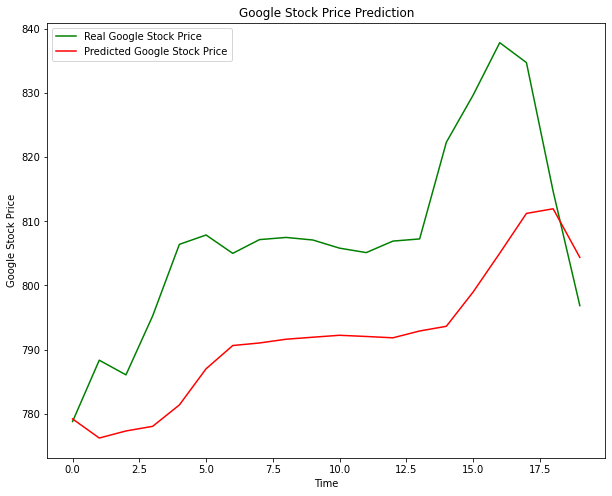

In [180]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.plot(real_price, color = 'green', label = 'Real Google Stock Price')
plt.plot(predicted_price[:,0], color = 'red', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')

plt.legend()
plt.show()